## Lab 3

In [116]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Import modules for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFE

In [117]:
# Load the Titanic Dataset that we cleaned from last week
df = pd.read_csv('../../data/TitanicCleaned.csv')
df.tail()

,PassengerId,Survived,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
1304,1305,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
1305,1306,NaN,1,0,0,True,3,3,False,False,False,False,False,False,True
1306,1307,NaN,3,0,0,False,3,0,True,False,True,False,True,False,False
1307,1308,NaN,3,0,0,False,1,1,True,False,True,False,True,False,False
1308,1309,NaN,3,1,1,False,1,2,True,False,False,False,False,False,False


###  Task 1: Split the dataset into two parts: 


In [118]:
  # Training set and Test Set

# Train set with passengers with known 'Survived' values
df_train = df[df['Survived'].notnull()]
print(len(df_train))

# Test set with passengers with unknown 'Survived' values
df_test = df[df['Survived'].isnull()] 
print(len(df_test))

# Save the datasets as CSV files for future use
df_train.to_csv('../../data/TitanicTrain.csv', index=False)
df_test.to_csv('../../data/TitanicTest.csv', index=False)

df_train = pd.read_csv('../../data/TitanicTrain.csv')
df_test = pd.read_csv('../../data/TitanicTest.csv')

print(df_train.columns)


891
418
Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'HasCabin',
       'CatAge', 'CatFare', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Unique'],
      dtype='object')


### Task 2: Create a New Feature "TravelAlone"


In [119]:
  # According to the data dictionary, the SibSp and Parch columns are related to travelling with family.
  # Create new categorical variable: Travelled alone or not
  # 1: Travelled alone
  # 0: Travelled with family
  # Drop the SibSp and Parch columns after creating the new feature

df_train.loc[:, 'TravelAlone'] = np.where((df_train["SibSp"] + df_train["Parch"]) > 0, 0, 1)
# np.where(condition, value_if_true, value_if_false)
# If (SibSp + Parch) > 0, set TravelAlone to 0 (not alone), otherwise set it to 1 (alone).

df_train.drop(['SibSp', 'Parch'], axis=1, inplace=True) 
# Axis=1 drop columns, Axis=0 drop rows

df_train.head()


,PassengerId,Survived,Pclass,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique,TravelAlone
0,1,0.0,3,False,0,0,True,False,True,False,True,False,False,0
1,2,1.0,1,True,3,3,False,False,False,False,False,True,False,0
2,3,1.0,3,False,1,1,False,False,True,True,False,False,False,1
3,4,1.0,1,True,2,3,False,False,True,False,False,True,False,0
4,5,0.0,3,False,2,1,True,False,True,False,True,False,False,1


### Task 3: Explore the Data


In [120]:
  # 1. Visualize the impact of age categories on survival in a density plot
  # 2. Analyse other features such as 'Fare', 'Pclass', 'Sex', 'TravelAlone'
  # 3. Interpret and write down your observations

# Example for CatAge:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatAge"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatAge"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age Category for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-1,4)
plt.show()

KeyboardInterrupt: 

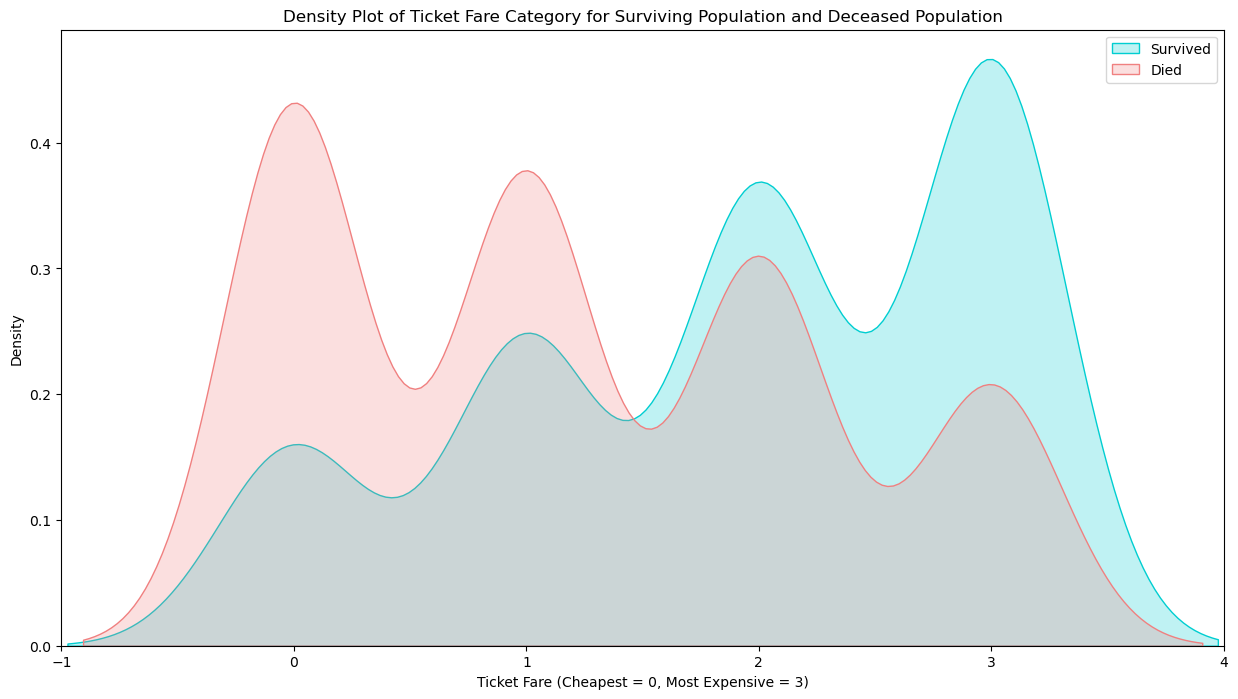

In [100]:
# CatFare Density Plot:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["CatFare"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["CatFare"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Ticket Fare Category for Surviving Population and Deceased Population')
ax.set(xlabel='Ticket Fare (Cheapest = 0, Most Expensive = 3)')
plt.xlim(-1,4)
plt.show()

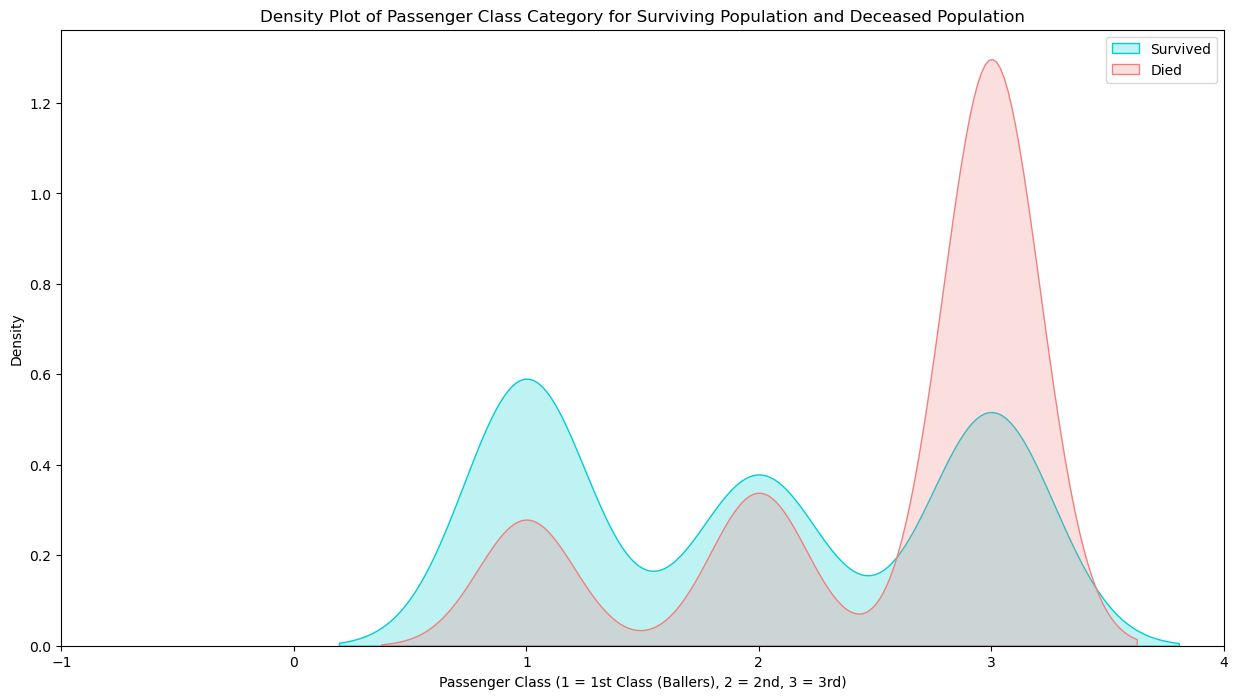

In [101]:
# PClass:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pclass"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pclass"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Passenger Class Category for Surviving Population and Deceased Population')
ax.set(xlabel='Passenger Class (1 = 1st Class (Ballers), 2 = 2nd, 3 = 3rd)')
plt.xlim(-1,4)
plt.show()

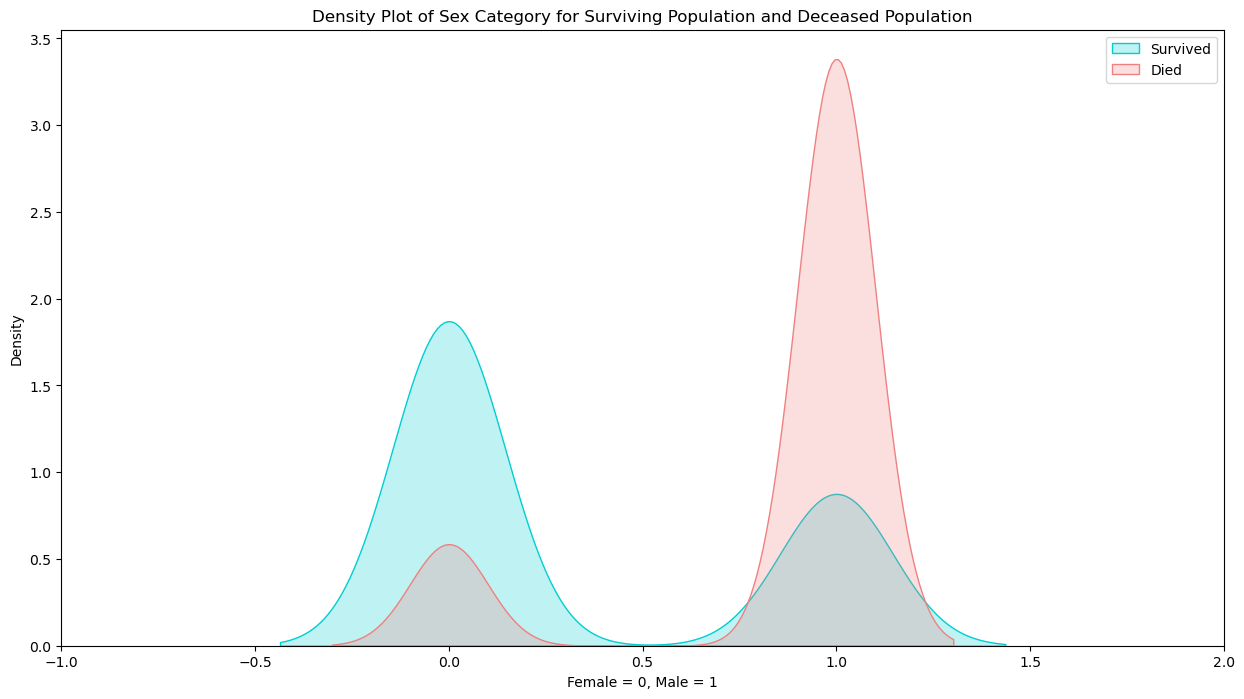

In [102]:
# Sex:

plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Sex_male"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Sex_male"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Sex Category for Surviving Population and Deceased Population')
ax.set(xlabel='Female = 0, Male = 1')
plt.xlim(-1, 2)
plt.show()

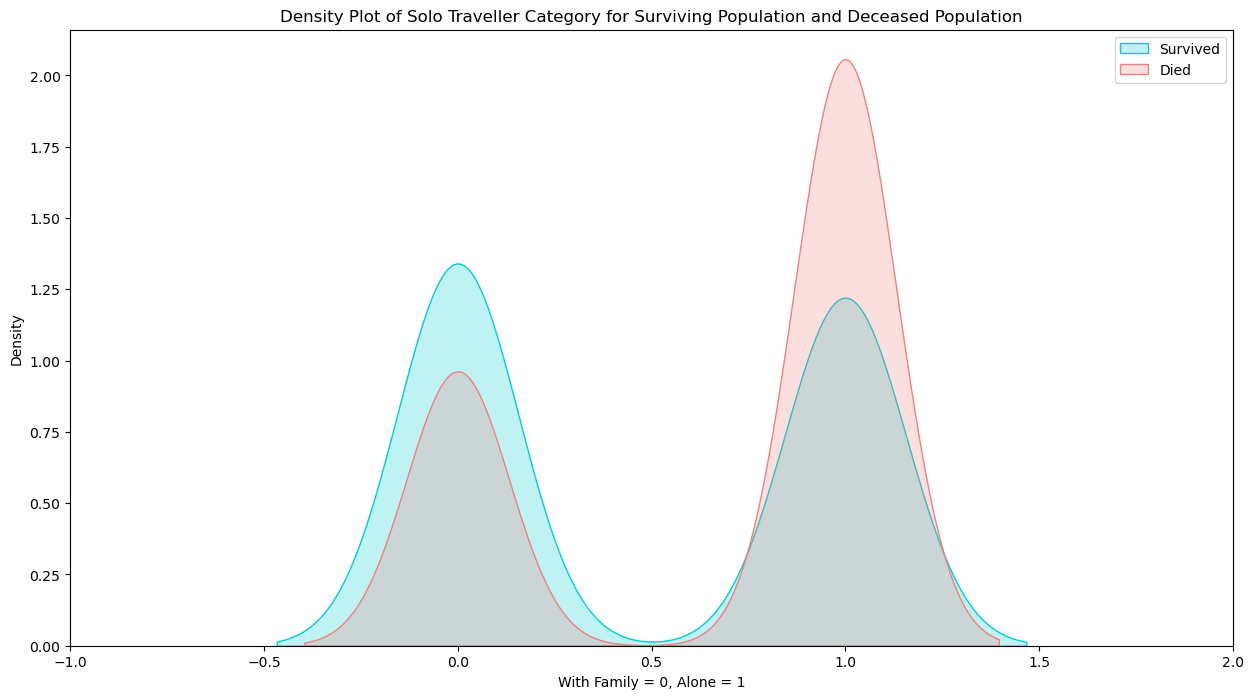

In [103]:
# Travelled Alone:

plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["TravelAlone"][df_train.Survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Solo Traveller Category for Surviving Population and Deceased Population')
ax.set(xlabel='With Family = 0, Alone = 1')
plt.xlim(-1, 2)
plt.show()

In [104]:
# # Adding Category 'Child':

# # Need to re-add the 'Age' column to the dataset
# original_df = pd.read_csv('https://raw.githubusercontent.com/DAVE3625/DAVE3625-24H/refs/heads/main/Lab2/data/Titanic.csv')
# original_df.to_csv('../../data/Titanic.csv', index=False)

# age = original_df['Age']
# age.fillna(age.mean(), inplace=True)

# # Add the 'Age' column to the dataset
# df_train['Age'] = age

# # Age column where age is less than 16
# df_train.loc[:, 'Child'] = np.where(df_train['Age'] < 16, 1, 0)
# # np.where(condition, value_if_true, value_if_false)

# # Drop the 'Age' column
# df_train.drop('Age', axis=1, inplace=True)

# plt.figure(figsize=(15,8))
# ax = sns.kdeplot(df_train["Child"][df_train.Survived == 1], color="darkturquoise", fill=True)
# sns.kdeplot(df_train["Child"][df_train.Survived == 0], color="lightcoral", fill=True)
# plt.legend(['Survived', 'Died'])
# plt.title('Density Plot of Child Category for Surviving Population and Deceased Population')
# ax.set(xlabel='Child = 1, Adult = 0')
# plt.xlim(-0.5,1.5)
# plt.show()

### Task 4: Compute the Correlation Matrix


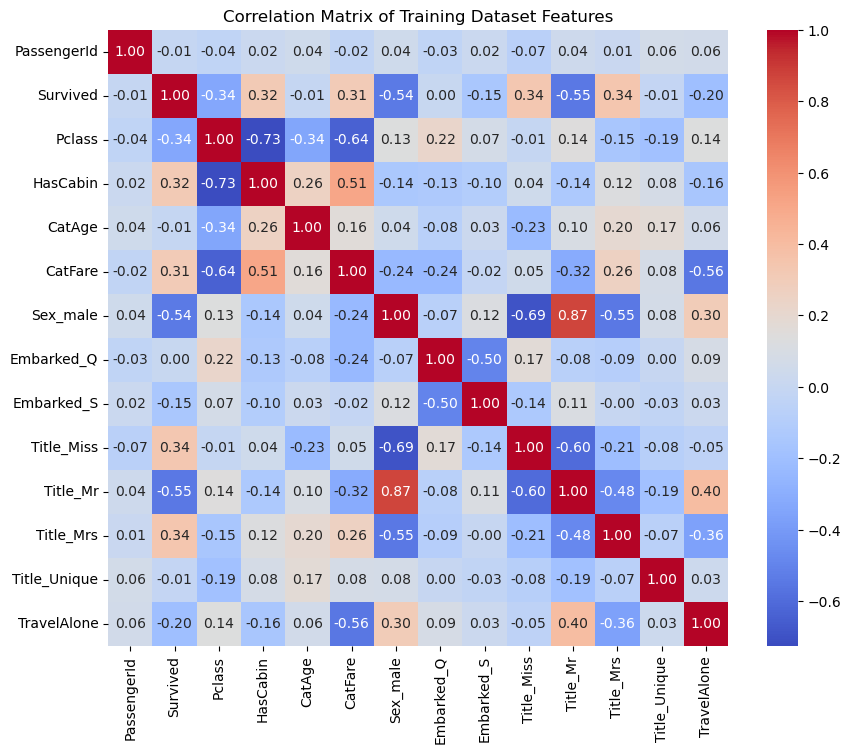

In [105]:
  # Understanding correlation between features can help in feature selection

# 1. Compute the correlation matrix for df_train
# 2. Visualize the correlation matrix using a heatmap
# 3. Identify any strong relationships


# Compute the correlation matrix
correlation_matrix = df_train.corr()

# Visualize
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Training Dataset Features')
plt.show()


### Task 5: Perform Feature Selection with RFE


In [106]:
  # RFE = Recursive Feature Elimination

# Prepare the data:
X = df_train.drop(['PassengerId', 'Survived'], axis=1)
Y = df_train['Survived'] 

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X, Y)

# List selected features:
selected_features = X.columns[rfe.support_]
print('Selected Features: ', selected_features)


Selected Features:  Index(['Pclass', 'HasCabin', 'Sex_male', 'Embarked_S', 'Title_Miss',
       'Title_Mr', 'Title_Unique', 'TravelAlone'],
      dtype='object')


### Task 6: Build and Evaluate the Logistic Regression Model


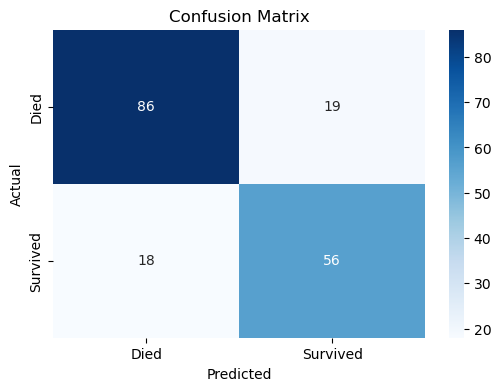

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       105
         1.0       0.75      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



In [107]:

# 1. Split data
X = df_train[selected_features]
Y = df_train['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 2. Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# 3. Make predictions
Y_pred = model.predict(X_test)

# 4. Evaluate the model
# Confusion Matrix:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report:
print(classification_report(Y_test, Y_pred))




### Task 7: Understanding Evaluation Metrics


Accuracy: 0.79
Log Loss: 0.43
AUC: 0.87


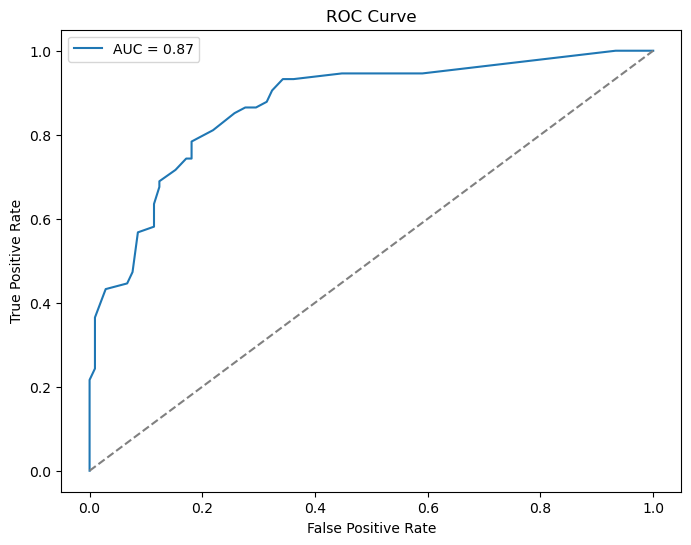

In [113]:

from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, roc_curve

# Accuracy (correct predictions / total predictions)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Log Loss (penalizes false classifications) - the lower the better (0 = perfect)
Y_pred_prob = model.predict_proba(X_test)[:,1]
logloss = log_loss(Y_test, Y_pred_prob)
print(f'Log Loss: {logloss:.2f}')

# AUC (Area Under the Curve) - the higher the better (1 = perfect, 0 = worst)
auc = roc_auc_score(Y_test, Y_pred_prob)
print(f'AUC: {auc:.2f}')

# Plot the ROC curve (Receiver Operating Characteristic)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Task 8: Cross Validation

In [115]:
from sklearn.model_selection import cross_val_score

# Initialize
model = LogisticRegression(max_iter=1000)

# Accuracy
scores_accuracy = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print(f'Average Accuracy: {scores_accuracy.mean():.2f}')

# Log Loss
scores_logloss = cross_val_score(model, X, Y, cv=10, scoring='neg_log_loss')
print(f'Average Log Loss: {-scores_logloss.mean():.2f}')

# AUC
scores_auc = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(f'Average AUC: {scores_auc.mean():.2f}')

Average Accuracy: 0.81
Average Log Loss: 0.44
Average AUC: 0.86
